# 4. SVD(Singular Value Decomposition)
## SVD 개요
#### SVD 역시 PCA와 유사한 행렬 분해 기법을 이용한다.
#### PCA의 경우 정방행렬만을 고유벡터로 분해할 수 있지만, SVD는 정방행렬뿐만 아니라 행과 열의 크기가 다른 행렬에도 적용할 수 있다.
#### SVD는 m X n 크기의 행렬 A를 아래와 같이 분해하는 것을 의미한다.
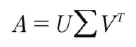

#### 특이값 분해로 불리며, 행렬 U와 V에 속한 벡터는 특이벡터이며, 모든 특이벡터는 서로 직교하는 성질을 가진다.
#### Σ는 대각행렬이며, 행렬의 대각에 위치한 값만 0이 아니고 나머지 위치의 값은 모두 0이다
#### Σ이 위치한 0이 아닌 값이 바로 행렬 A의 특이값이다!
#### SVD는 A의 차원이 m X n일 때 U의 차원이 m X m, Σ의 차원이 m X n, V^t의 차원이 n X n으로 분해한다. (아래 그림)
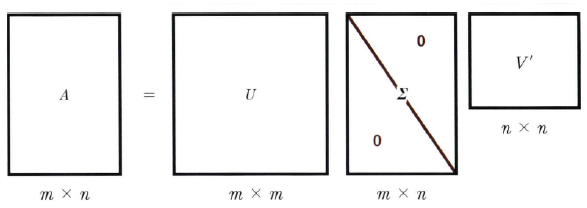

#### 하지만 일반적으로는 Σ의 비대각인 부분과 대각원소 중에 특이값이 0인 부분도 모두 제거하고 제거된 Σ에 대응되는 U와 V원소도 제거해 차원을 주인 형태의 SVD를 적용한다.
#### 이렇게 컴팩트한 SVD는 A의 차원이 m X n일 때 U의 차원이 m X p, Σ의 차원이 p X p, V^t의 차원이 p X n으로 분해한다. (아래 그림)
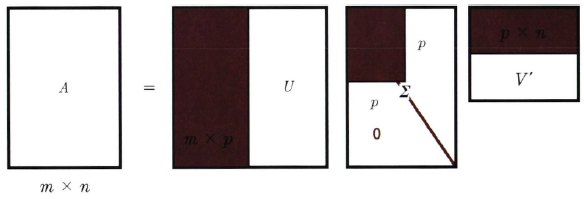

#### Truncated SVD는 Σ의 대각원소 중에서 상위 몇 개만 추출해서 더운 차원을 줄인 형태로 분해하는 것이다.
#### 넘파이의 SVD 분해가 어떻게 이뤄지는지 수행해보자

In [1]:
import numpy as np
from numpy.linalg import svd

np.random.seed(121)
a = np.random.randn(4, 4)
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


#### svd 파라미터로 원본 행렬을 입력하면 U 행렬, Sigma 행렬, V 전치 행렬을 반환한다.
#### Sigma 행렬은 0이 아닌 값만 1차원 행렬로 표현한다.

In [3]:
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('U matrix:\n',np.round(U, 3))
print('Sigma Value:\n',np.round(Sigma, 3))
print('V transpose matrix:\n',np.round(Vt, 3))

(4, 4) (4,) (4, 4)
U matrix:
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma Value:
 [3.423 2.023 0.463 0.079]
V transpose matrix:
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


#### 분해된 행렬들을 이용해 원본 행렬로 복원해보자
#### 유의할 점은 Sigma의 경우 0이 아닌 값만 1차원으로 추출했기 때문에 다시 0을 포함한 대칭행렬로 변환한 뒤에 내적을 수행해야 한다.

In [4]:
Sigma_mat = np.diag(Sigma)
a_ = np.dot(np.dot(U, Sigma_mat), Vt)
print(np.round(a_, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


#### 이번에는 데이터 세트가 로우 간 의존성이 있을 경우 어떻게 Sigma가 변하고, 이에 따른 차원 축소가 진행되는지 확인해보자
#### 일부러 의존성을 부여하기 위해 a 행렬의 3번째 로우를 '첫 번째 로우 + 두 번째 로우'로 업데이트하고, 4번째 로우는 첫 번째 로우와 같다고 하자

In [5]:
a[2] = a[0] + a[1]
a[3] = a[0]
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [6]:
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('Sigma Value:\n',np.round(Sigma,3))

(4, 4) (4,) (4, 4)
Sigma Value:
 [2.663 0.807 0.    0.   ]


#### Sigma 값 중 2개가 0으로 변했고, 이 의미는 선형 독립인 로우 벡터의 개수가 2개라는 의미다.
#### 전체 데이터를 이용하지 않고 앞의 2개요소만 추출한 복원해보자

In [7]:
U_ = U[:, :2]
Sigma_ = np.diag(Sigma[:2])
Vt_ = Vt[:2]
print(U_.shape, Sigma_.shape, Vt_.shape)
# U, Sigma, Vt의 내적을 수행하며, 다시 원본 행렬 복원
a_ = np.dot(np.dot(U_,Sigma_), Vt_)
print(np.round(a_, 3))

(4, 2) (2, 2) (2, 4)
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


#### 이번에는 Truncated SVD를 이용해 행렬을 분해해보자
#### 특이값 중 상위 일부 데이터만 추출해 분해하는 방식으로 인위적으로 더 작은 차원으로 분해하기 때문에 원본 행렬을 정확하게 다시 복원할 순 없다.
#### 하지만, 데이터 정보가 압축되어 분해되기 때문에 리소스 측면에서 좋다

In [8]:
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

# 원본 행렬을 출력하고, SVD를 적용할 경우 U, Sigma, Vt 의 차원 확인 
np.random.seed(121)
matrix = np.random.random((6, 6))
print('원본 행렬:\n',matrix)
U, Sigma, Vt = svd(matrix, full_matrices=False)
print('\n분해 행렬 차원:',U.shape, Sigma.shape, Vt.shape)
print('\nSigma값 행렬:', Sigma)

# Truncated SVD로 Sigma 행렬의 특이값을 4개로 하여 Truncated SVD 수행. 
num_components = 5
U_tr, Sigma_tr, Vt_tr = svds(matrix, k=num_components)
print('\nTruncated SVD 분해 행렬 차원:',U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print('\nTruncated SVD Sigma값 행렬:', Sigma_tr)
matrix_tr = np.dot(np.dot(U_tr,np.diag(Sigma_tr)), Vt_tr)  # output of TruncatedSVD

print('\nTruncated SVD로 분해 후 복원 행렬:\n', matrix_tr)

원본 행렬:
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

분해 행렬 차원: (6, 6) (6,) (6, 6)

Sigma값 행렬: [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]

Truncated SVD 분해 행렬 차원: (6, 5) (5,) (5, 6)

Truncated SVD Sigma값 행렬: [0.35834824 0.55463089 0.83865238 0.88116505 3.2535007 ]

Truncated SVD로 분해 후 복원 행렬:
 [[0.11368271 0.19721195 0.23106956 0.15961551 0.82758207 0.41695496]
 [0.55500167 0.75007112 0.24913473 0.96608621 0.95355502 0.48681791]
 [0.01789183 0.85994318 0.40526464 0.62115143 0.29581906 0.92803075]
 [0.40782587 0.55456069 0.24397702 0.23294659 0.035838   0.58947208]
 [0.82711496 0.78558742 0.94865955 

## 사이컷런 TruncatedSVD 클래스를 이용한 변환

Text(0, 0.5, 'TruncatedSVD Component 2')

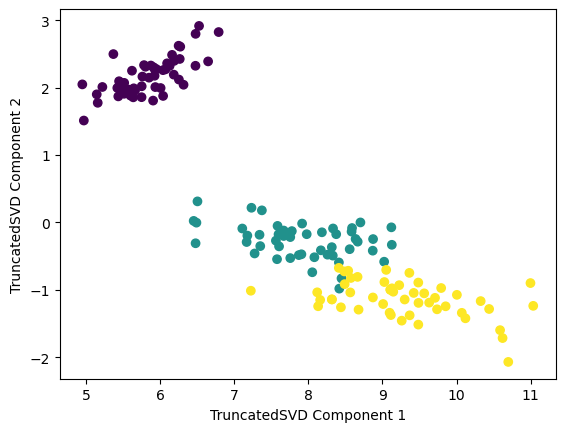

In [9]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
# 2개의 주요 component로 TruncatedSVD 변환
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

# Scatter plot 2차원으로 TruncatedSVD 변환 된 데이터 표현. 품종은 색깔로 구분
plt.scatter(x=iris_tsvd[:,0], y= iris_tsvd[:,1], c= iris.target)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')

#### 사이킷런의 TruncatedSVD와 PCA 클래스 구현을 내부적으로 보면 두 개 클래스 모두 SVD를 이용해 행렬을 분해한다.
#### 아래 붓꽃 데이터를 스케일링으로 변환한 뒤 TruncatedSVD와 PCA 클래스 변환을 해보면 두 개가 거의 동일하다.

Text(0.5, 1.0, 'PCA Transformed')

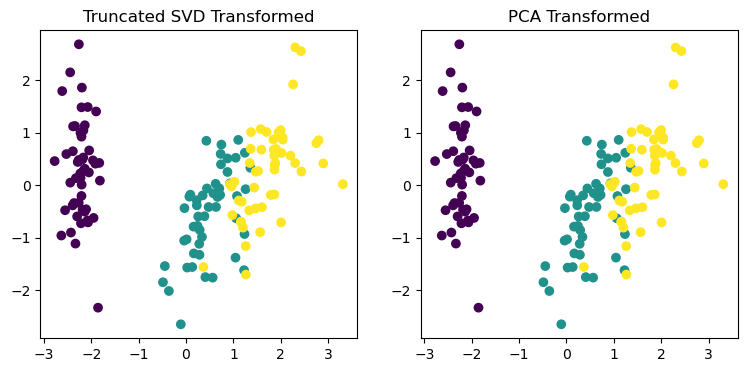

In [10]:
from sklearn.preprocessing import StandardScaler

# iris 데이터를 StandardScaler로 변환
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

# 스케일링된 데이터를 기반으로 TruncatedSVD 변환 수행 
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

# 스케일링된 데이터를 기반으로 PCA 변환 수행 
pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

# TruncatedSVD 변환 데이터를 왼쪽에, PCA변환 데이터를 오른쪽에 표현 
fig, (ax1, ax2) = plt.subplots(figsize=(9,4), ncols=2)
ax1.scatter(x=iris_tsvd[:,0], y= iris_tsvd[:,1], c= iris.target)
ax2.scatter(x=iris_pca[:,0], y= iris_pca[:,1], c= iris.target)
ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed')

#### 두 개의 변환 행렬 값과 원본 속성별 컴포넌트 비율값을 실제로 비교해보면 거의 같다.

In [12]:
print((iris_pca - iris_tsvd).mean())
print((pca.components_ - tsvd.components_).mean())

2.3294560724806955e-15
3.8163916471489756e-17


#### 모두 0에 가까운 값이므로 2개의 변환이 서로 동일하다는 것을 알 수있다.
#### 즉, 데이터 세트가 스케일링으로 데이터 중심이 동일해지면 사이킷런의 SVD와 PCA는 동일한 변환을 수행한다.
#### 하지만, PCA는 밀집 행렬에 대한 변환만 가능하며, SVD는 희소 행렬에 대한 변환도 가능하다.

#### SVD는 PCA와 유사하게 컴퓨터 비전 영역에서 패턴 인식과 신호 처리 분야에서 사용되고, 텍스트의 토픽 모델링 기법인 LSA 기반 알고리즘이다.